# Neuroscience of Learning, Memory, and Cognition
## Programming Exercise #1:
### Basics of Python and Numpy
#### March 2019
#### Name:AmirHosein Rostami
#### Student ID:96101635

In [ ]:
'''
You can import all the packages and functions you use in this cell
try to use different types of import statements,
such as importing specific functions and renaming packages
'''
import numpy as np


1. Generate a diagonal matrix with a random permutation of integers between 1 to 10 (inclusive) in the diagonal and zeros elsewhere.

In [ ]:
A1 = np.random.permutation(10) + 1
print(np.diag(A))

2. Generate a 1D array of 500 evenly spaced points between 0 and 3 (inclusive). Next, reshape this array to a 10x10x5 array.

In [ ]:
A2 = np.linspace(0,3, num=500)
np.reshape(A2,(10,10,5))

3. Create a Numpy array called `a`. Make a copy of it called `b`, and use `id()` to check whether their IDs match or not.

In [ ]:
a = [[1,2,3],[4,5,6],[7,8,9]]
b = np.copy(a)
print(id(a) == id(b))

4. Generate a 100x100 matrix, which elements are sampled from a standard normal distrubtion. Show that the mean and standard deviation of this matrix is close to 0 and 1, as we expect.

In [ ]:
s = np.random.normal(0, 1, 10000)
s = np.reshape(s,[100,100])
mean = np.mean(s)
var = np.var(s)
print("var is " + str(var) + " & mean is " + str(mean))
# as you see the mean is around 0 and the var is around 1

5. Generate a random array of your choice and save it as `.npy` file called *randmat*. Then, load it to a variable called `randmat`.

In [264]:
myNumber = 10
myArray = np.random.normal(0,1,myNumber)
print(f" Your Array is:\n{myArray}")
from tempfile import TemporaryFile
randmat = TemporaryFile()
np.save(randmat, myArray)
randmat.seek(0) # Only needed here to simulate closing & reopening file
np.load(randmat)

 Your Array is:
[ 0.76  -0.191  0.237  1.119  0.828  0.328 -0.829 -0.852 -1.152  0.853]


array([ 0.76 , -0.191,  0.237,  1.119,  0.828,  0.328, -0.829, -0.852,
       -1.152,  0.853])

6. Generate 3 different arrays and call them a, b, and c. Save all these arrays to a `.npz` file called *mats*. Load them and store each array in a separate variable.

In [267]:
myNumber = 10
a = np.random.normal(0,1,myNumber)
print(f"{a}\n")
b = np.random.normal(0,1,myNumber)
print(f"{b}\n")
c = np.random.normal(0,1,myNumber)
print(f"{c}\n")

from tempfile import TemporaryFile
mats = TemporaryFile()
np.savez(mats,a,b,c)
mats.seek(0) # Only needed here to simulate closing & reopening file
npzfile = np.load(mats)
npzfile.files

a = npzfile['arr_0']
b = npzfile['arr_1']
c = npzfile['arr_2'] 

print(f"loaded a is :\n{a}")
print(f"loaded b is :\n{b}")
print(f"loaded c is :\n{c}")


[ 0.051  1.073 -1.546 -0.761 -0.097  0.93  -0.134 -1.375  0.146 -0.901]

[ 1.771  1.088  0.285  1.042  1.393 -0.686 -1.39  -0.591 -0.061  0.247]

[-0.98  -0.726 -0.34   0.832  0.204 -0.348  0.429  0.268  0.677 -1.363]

loaded a is :
[ 0.051  1.073 -1.546 -0.761 -0.097  0.93  -0.134 -1.375  0.146 -0.901]
loaded b is :
[ 1.771  1.088  0.285  1.042  1.393 -0.686 -1.39  -0.591 -0.061  0.247]
loaded c is :
[-0.98  -0.726 -0.34   0.832  0.204 -0.348  0.429  0.268  0.677 -1.363]


7. Write a function called `describe_array`, which receives a 2D Numpy array as input and prints out the following statistics for that array:
    - Mean
    - Variance
    - Maximum of a random row
    - Third smallest element of a random column
    - Correlation of two random rows
    - Median of a random column
    - Euclidean norm of the array
    - Determinant of the array
    - Trace of the array
    
    You should use f-strings to create the multi-line output of this function in a readable manner.

In [295]:
def describe_array(inputMat):
    inputMat = np.array(inputMat)
    
    matMean = np.mean(inputMat)
    print("inputMat's Mean is : ",matMean)
    matVar  = np.var(inputMat)
    print("inputMat's Mean is :",matVar)
    
    dimensions = np.shape(inputMat)
    randomRowNumber = np.random.randint(0,dimensions[0])
    Row = inputMat[randomRowNumber,:]
    maxRowElement = np.max(Row)
    print("Maximum of a random row is: ",maxRowElement)

    randomColumnNumber = np.random.randint(0,dimensions[1])
    randomColumn = inputMat[:,randomColumnNumber]
    sortedColumnElements = np.sort(randomColumn)
    thirdSmallest = sortedColumnElements[2]
    print("Third smallest element of a random column",thirdSmallest)
    
    random1 = np.random.randint(0,dimensions[0])
    random2 = np.random.randint(0,dimensions[0])
    correlation = np.correlate(inputMat[:,random1],inputMat[:,random2])
    print("the correlation is: ",correlation)
    
    randomColumnNumber = np.random.randint(0,dimensions[1])
    randomColumn = inputMat[:,randomColumnNumber]
    median = np.median(randomColumn);
    print("Median of a random column is: ",median)
    
    euclideanNorm = np.linalg.norm(inputMat,'fro') # frobenius norm is equal to EuclideanNorm ...
    print("EuclideanNorm norm of inputArray is: ",euclideanNorm)
    
    Determinant = np.linalg.det(inputMat)
    print("Determinant of input array: ",Determinant)
    
    trace = np.trace(inputMat)
    print("Trace of the inputArray is: ",trace)
    
    #total output
    print(f"inputMat's Mean is : {matMean} \n" + f"inputMat's Variance is : {matVar} \n" + 
      f"Maximum of a random row is: {maxRowElement} \n" + f"Third smallest element of a random column is: {thirdSmallest} \n"
      f"the correlation is: {correlation}" + f"Median of a random column is: {median} \n"
      f"EuclideanNorm norm of inputArray is: {euclideanNorm} \n" + f"Determinant of input array: {Determinant} \n" 
      f"Trace of the inputArray is: {trace} \n")
      
        
matrixSize = 10 # you can change it easily
myArray = []
for i in range(matrixSize):
    myArray = np.concatenate((myArray,np.random.randint(0,10,10)), axis=0)
myArray = np.reshape(myArray,[matrixSize,matrixSize])
print(myArray)    
describe_array(myArray)

[[8. 4. 0. 0. 8. 2. 9. 8. 7. 4.]
 [1. 9. 6. 7. 2. 4. 0. 7. 7. 3.]
 [8. 0. 9. 2. 6. 2. 9. 1. 9. 4.]
 [4. 8. 0. 2. 6. 8. 7. 7. 9. 9.]
 [1. 6. 9. 2. 5. 3. 5. 1. 5. 4.]
 [9. 9. 4. 6. 8. 9. 8. 6. 0. 5.]
 [6. 6. 3. 3. 0. 8. 3. 8. 1. 7.]
 [7. 1. 8. 8. 2. 1. 7. 9. 3. 5.]
 [5. 2. 8. 4. 2. 6. 7. 9. 1. 7.]
 [6. 3. 9. 3. 7. 5. 8. 5. 4. 6.]]
inputMat's Mean is :  5.14
inputMat's Mean is : 8.320400000000001
Maximum of a random row is:  9.0
Third smallest element of a random column 2.0
the correlation is:  [207.]
Median of a random column is:  4.5
EuclideanNorm norm of inputArray is:  58.9406481131655
Determinant of input array:  205242843.0000004
Trace of the inputArray is:  61.0
inputMat's Mean is : 5.14 
inputMat's Variance is : 8.320400000000001 
Maximum of a random row is: 9.0 
Third smallest element of a random column is: 2.0 
the correlation is: [207.]Median of a random column is: 4.5 
EuclideanNorm norm of inputArray is: 58.9406481131655 
Determinant of input array: 205242843.0000004 
Trace o

8. Generate an array of random integers between 1 to 20 (exclusive). Extract all the elements that are between 14 and 17 (inclusive) into another array.

In [271]:
arraySize = 20; # there isnt any necessary limits on this noneZero_variable.
randmat = np.random.randint(2,20,arraySize)
extractedElements = [x for x in randmat if x>=14 and 17>=x]
print(extractedElements)

[16, 15, 15, 17]


9. Generate a 1D array of length 20 from floating point numbers between 0 and 1. Divide every element of this array by 1000. Change Numpy's printing options, so that only the first 10 numbers are shown. These numbers should not be printed in the scientific notation, and should not have more than 4 decimal places.

In [464]:
randmat = np.random.normal(0,1,20);
randmat = np.abs(randmat)
randmat = randmat/1000
np.set_printoptions(precision = 3,threshold = 10,suppress  = 'false',edge)
print(randmat)

[0.001 0.001 0.    0.    0.001 0.002 0.    0.001 0.001 0.001 0.    0.001
 0.    0.001 0.001 0.002 0.    0.001 0.    0.   ]


10. Write a function that returns the softmax scores of a 1D vector.

In [273]:
import math
def softmaxScore(inputVector):
    sumofAll = 0;
    for element in inputVector:
        sumofAll = sumofAll + math.exp(element)
    softmaxScores = [math.exp(x)/sumofAll for x in inputVector]
    return softmaxScores
exampleVector = [1,2,3]
print(softmaxScore(exampleVector))


[0.09003057317038046, 0.24472847105479767, 0.6652409557748219]


In [274]:
def neededFunction(numberOfVectors,SizeofVectors):
    myList = []
    for i in range(numberOfVectors):
        myList.append(np.random.randint(1,6,SizeofVectors))
    return myList 
example = neededFunction(3,6)
print(example)

[array([4, 5, 2, 1, 5, 3]), array([1, 2, 1, 5, 4, 2]), array([3, 5, 2, 5, 3, 1])]


12. Compute the following:
    - One-dimensional DFT of `a` and call it `a_fft`
    - One-dimensional inverse DFT of `a_fft`
    - One-dimensional discrete Fourier Transform for a real input such as `[0, 1, 0, 0]`
    - DFT sample frequencies of `[-2, 8, 6, 4, 1, 0, 3, 5]`

In [275]:
a = np.exp(2j * np.pi * np.arange(8))
print(f"a is: \n{a}\n")
a_fft = np.fft.fft(a)
print(f"Discrete fourier transform of a is:\n{a_fft}\n")
inverse_fft = np.fft.ifft(a_fft)
print(f"Inverse Discrete fourier transform of a is: \n{a_fft}\n")
realinputs = [0,1,0,0]
real_DFT = np.fft.rfft(realinputs)
print(f"DFT of a real inputs{realinputs} is:\n{real_DFT}\n")

signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
#fourier = np.fft.fft(signal)
n = signal.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
freq


a is: 
[1.+0.000e+00j 1.-2.449e-16j 1.-4.899e-16j 1.-7.348e-16j 1.-9.797e-16j
 1.-1.225e-15j 1.-1.470e-15j 1.-1.715e-15j]

Discrete fourier transform of a is:
[ 8.000e+00-6.858e-15j  2.365e-15+9.797e-16j  9.797e-16+9.797e-16j
  4.058e-16+9.797e-16j  0.000e+00+9.797e-16j -4.058e-16+9.797e-16j
 -9.797e-16+9.797e-16j -2.365e-15+9.797e-16j]

Inverse Discrete fourier transform of a is: 
[ 8.000e+00-6.858e-15j  2.365e-15+9.797e-16j  9.797e-16+9.797e-16j
  4.058e-16+9.797e-16j  0.000e+00+9.797e-16j -4.058e-16+9.797e-16j
 -9.797e-16+9.797e-16j -2.365e-15+9.797e-16j]

DFT of a real inputs[0, 1, 0, 0] is:
[ 1.+0.j  0.-1.j -1.+0.j]



array([ 0.  ,  1.25,  2.5 ,  3.75, -5.  , -3.75, -2.5 , -1.25])

13. Create x, a vector of evenly spaced numbers between 0 and 40. Then, generate `y1` and `y2` where $y_1=\sin(x)$ and $y_2=\sin(2x)+\cos(x)$. Use matplotlib to plot `y1` and `y2` in a figure. The figure should have the following features:
    - Legend: Both x and y axis should have titles
    - Color: $y_1$ line should be green and $y_2$ line should be red
    - Marker: markers for $y_1$ and $y_2$ should be squares and traingles, respectively
    - Line style: $y_1$ and $y_2$ should have different line styles

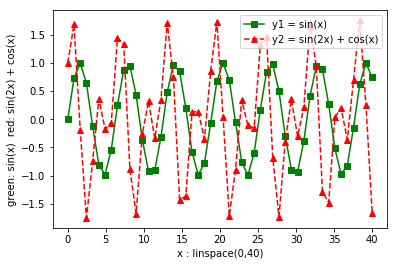

In [314]:
from matplotlib import pyplot as plt

# since there isnt any 
x = np.linspace(0,40)
plt.plot(x,np.sin(x),'gs-',x,np.sin(2*x) + np.cos(x),'r^--') 
# g:green s:square -:'-' line style
# r:red   ^:triangle --:'--' line style
plt.xlabel("x : linspace(0,40)")
plt.ylabel("green: sin(x)  red: sin(2x) + cos(x)")
plt.legend(['y1 = sin(x)','y2 = sin(2x) + cos(x)'])
plt.show()

14. Create x, a vector of evenly spaced numbers between 0 and 30. Then, generate `y` where `y` is x times two plus a random noise. Use matplotlib to draw a scatter plot from `x` and `y`.

    Similar to 13, try to experiment with different features of the scatter plot, such as marker color and size.

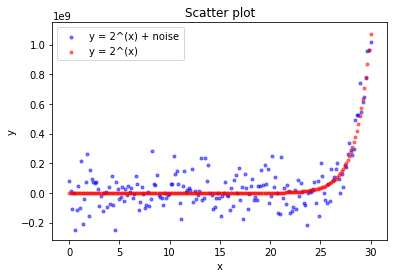

In [479]:
vecSize = 200; # there isnt any condition on this variable ...
x = np.linspace(0,30,vecSize)
noise = (10**8)*np.random.normal(0,1,vecSize)
color1 = (0,0,1)
color2 = (1,0,0)
area = np.pi*3
y = 2**x + noise

plt.scatter(x, y, s=area, c=color1, alpha=0.5)
plt.scatter(x,2**x,s=area, c=color2, alpha=0.5)
# alpha density of graphs
# s is the area of circles used in plotting ...
# c is the color of drawn circles
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y = 2^(x) + noise','y = 2^(x)'])
plt.show()